##Generation de graph

Liste des points : [(500.0, 500.0), (777, 517), (205, 974), (859, 865), (565, 506), (286, 843), (30, 587), (551, 159), (437, 782), (999, 801), (460, 304), (992, 318), (866, 198), (144, 790), (502, 415), (532, 477), (443, 408), (583, 798), (389, 548), (894, 188), (531, 261), (317, 878), (547, 889), (841, 233), (556, 492), (246, 799), (256, 935), (287, 20), (877, 574), (898, 472), (494, 20), (306, 197), (758, 931), (404, 538), (617, 215), (87, 465), (448, 338), (319, 862), (535, 140), (854, 195), (661, 974), (474, 602), (587, 542), (854, 294), (680, 24), (349, 791), (457, 454), (351, 415), (680, 507), (552, 508), (250, 41), (209, 485), (386, 86), (62, 852), (41, 576), (313, 121), (432, 559), (910, 800), (813, 436), (313, 295), (345, 780), (770, 555), (663, 538), (943, 51), (913, 463), (438, 301), (594, 187), (932, 138), (70, 297), (772, 840), (107, 395), (772, 869), (138, 304), (126, 163), (295, 858), (544, 825), (8, 267), (583, 880), (977, 122), (218, 150), (493, 116), (215, 132), (821,

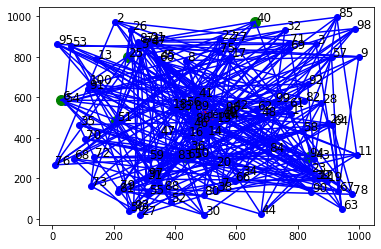

In [78]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

def pointGeneration(nb):
    n = nb
    scale = 10*n
    maxJoint = 1

    depot = (scale/2,scale/2)
    pointList = [depot]
    
    for i in range(n):
        pointList += (i,)
        pointList[i+1] = (random.randrange(0,scale),random.randrange(0,scale))
        
    return pointList
#------------------------------------------------------------------------------------
def plotPoints(pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)
    for i in range(len(pointList)):
        if (i!= 0):
            plt.plot(pointList[i][0], pointList[i][1],"bo")
            plt.annotate(i, (pointList[i][0]+3, pointList[i][1]+3), fontsize=12)
#------------------------------------------------------------------------------------
def randomPackages(nb, nbPointsMax):
    package = random.sample(range(1, nbPointsMax), nb)
    for i in range(len(package)):
        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)
    return package

def traceSolution(s,package, pointList):
    plt.plot(pointList[0][0],pointList[0][1],"ro", markersize=15)
    plt.annotate("dépot", (pointList[0][0]+3, pointList[0][1]+3), fontsize=10)

    for i in range(len(package)):

        plt.plot(pointList[package[i]][0], pointList[package[i]][1],"go", markersize=10)

    for i in range(0,len(s)-1):
        x = (pointList[s[i]][0], pointList[s[i+1]][0])
        y = (pointList[s[i]][1], pointList[s[i+1]][1])
        plt.plot(x, y,"b", linestyle="solid")
        plt.annotate(s[i+1], (pointList[s[i+1]][0]+3, pointList[s[i+1]][1]+3), fontsize=12)

        
#------------------------------------------------------------------------------------
def makematrix(liste, linksLimit):
    matrix = np.zeros((len(liste),len(liste)))
    
    for i in range(len(matrix)):
        matrix[i][(i+1)%(len(matrix))] = 1
        matrix[(i+1)%(len(matrix))][i] = 1
    
    for i in range(len(matrix)):
        
        if i < len(matrix):
        
            nbchoisi = 0
            while(sum(matrix[i])<linksLimit and matrix[:, i].sum() < linksLimit):
                nbchoisi = np.random.randint(i,len(matrix))
                
                if (matrix[:, nbchoisi].sum() < linksLimit and sum(matrix[nbchoisi])<linksLimit):
                    matrix[i][nbchoisi] = 1
                    matrix[nbchoisi][i] = 1

            
                    
    for i in range(len(matrix)):
        matrix[i][i] = 0
    return matrix

            
def TraceLinks(matrix):
    # Pour chaque points, on trace une ligne avec chaque voisins
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(i>j):
                if matrix[i][j] > 0:
                    x = (pointList[i][0], pointList[j][0])
                    y = (pointList[i][1], pointList[j][1])
                    plt.plot(x, y,"b", linestyle="solid")

                    
#------------------------------------------------------------------------------------
def ponderation(pointList, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                poids = np.sqrt((pointList[i][0]-pointList[j][0])**2+(pointList[i][1]-pointList[j][1])**2)
                matrix[i][j] = round(poids)
                
                
#------------------------------------------------------------------------------------------------------------------------------------
nbPoints = 100
nbvoisins = 6
nbPackages = 8

pointList = pointGeneration(nbPoints)
print("Liste des points :", pointList)
plotPoints(pointList)
package = randomPackages(nbPackages, nbPoints)
matrix = makematrix(pointList, nbvoisins)
print("Matrice d'adjacence \n", matrix)
ponderation (pointList,matrix)
print("Matrice d'adjacence pondérée \n", matrix)
TraceLinks(matrix)


## generation de solution aléatoire

In [79]:
def generateSolution(matrix,package):

    packageLeft = package.copy()
    solution = [0]

    while(packageLeft):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
        if(randomNext in packageLeft):
            packageLeft.remove(randomNext)
    
    while(solution[-1] != 0):
        randomNext = np.random.randint(0,len(matrix))
        while( matrix[solution[-1]][randomNext] == 0 ):
            randomNext = np.random.randint(0,len(matrix))
        solution.append(randomNext)
    
    return solution


def solutionLength(solution):

    totalLength = 0
    for i in range(0,len(solution)-1):
        totalLength += matrix[solution[i]][solution[i+1]]

    return totalLength

def generatePopulation(matrix,package):

    population = []
    for i in range(100):

        population.append(generateSolution(matrix,package))
        #print(population[i])
        #print(solutionLength(population[i]))

    return population

UniqueRandomSolution = generateSolution(matrix, package)
print(UniqueRandomSolution)

[0, 8, 48, 11, 7, 42, 7, 8, 18, 2, 18, 38, 57, 38, 37, 9, 37, 36, 35, 86, 49, 60, 59, 0, 8, 24, 23, 33, 19, 33, 34, 99, 16, 15, 71, 70, 71, 72, 84, 83, 84, 81, 80, 81, 84, 72, 71, 6, 7, 64, 78, 64, 47, 64, 47, 64, 65, 97, 96, 86, 85, 43, 44, 23, 59, 52, 61, 98, 49, 60, 49, 74, 47, 64, 47, 95, 12, 70, 65, 82, 65, 66, 100, 32, 33, 73, 74, 75, 74, 75, 94, 95, 94, 89, 92, 73, 92, 91, 90, 39, 38, 18, 19, 20, 70, 36, 55, 22, 21, 22, 55, 54, 55, 56, 2, 18, 63, 18, 63, 29, 42, 80, 42, 82, 56, 39, 38, 39, 90, 39, 56, 82, 14, 90, 6, 24, 67, 66, 55, 54, 17, 18, 8, 0, 100, 0, 100, 52, 53, 55, 56, 2, 56, 96, 19, 33, 32, 44, 45, 96, 56, 55, 36, 62, 61, 52, 45, 90, 89, 90, 39, 90, 89, 88, 87, 12, 13, 20, 19, 31, 5, 76, 5, 76, 5, 31, 15, 31, 30, 65, 97, 96, 86, 57, 38, 54, 53, 52, 61, 62, 1, 62, 13, 20, 3, 87, 86, 49, 50, 49, 98, 97, 84, 83, 73, 92, 89, 94, 95, 9, 4, 17, 18, 38, 54, 38, 85, 43, 85, 38, 54, 31, 30, 29, 30, 95, 96, 86, 57, 67, 9, 67, 57, 86, 49, 60, 40, 68, 40, 41, 42, 29, 81, 80, 22, 6

## Generation Solution Voisine

import random
def GetAllSolutionsVoisines(solution,matrix):
    solutions_voisines = []
    for p in solution:
        for i in range(len(matrix)):
            solvoisine = solution.copy()
            if (matrix[p][i] > 0):
                solvoisine[p] = i
                solutions_voisines.append(solvoisine)
    return solutions_voisines

        
            
solutions_voisines = GetAllSolutionsVoisines(UniqueRandomSolution, matrix)
print(solutions_voisines)
print(solutionLength(solutions_voisines[0]))

## Recuit Simulé

[40, 25, 6, 51, 86, 65, 56, 94]
[0, 100, 39, 38, 39, 56, 2, 56, 96, 86, 85, 21, 37, 9, 8, 9, 95, 12, 13, 62, 36, 67, 9, 37, 51, 50, 71, 50, 71, 50, 49, 86, 85, 38, 18, 8, 0, 8, 9, 4, 3, 87, 88, 87, 3, 2, 56, 39, 71, 15, 46, 15, 16, 34, 16, 41, 40, 41, 27, 80, 22, 55, 66, 1, 66, 12, 66, 100, 0, 8, 24, 6, 71, 70, 65, 64, 78, 77, 76, 5, 76, 75, 94, 75, 74, 75, 61, 60, 49, 60, 49, 50, 49, 74, 34, 35, 87, 86, 49, 74, 73, 93, 92, 91, 92, 91, 90, 45, 46, 47, 48, 26, 51, 50, 40, 87, 12, 87, 35, 10, 76, 5, 76, 41, 16, 99, 100, 39, 100, 66, 67, 36, 70, 20, 3, 53, 13, 20, 70, 71, 15, 16, 15, 17, 16, 57, 16, 34, 35, 87, 3, 20, 51, 21, 20, 51, 37, 38, 18, 2, 56, 2, 76, 10, 11, 53, 13, 20, 13, 12, 87, 86, 85, 43, 44, 45, 46, 45, 46, 25, 24, 0]
94291.0


[0, 24, 0, 24, 8, 7, 6, 24, 8, 7, 8, 24, 25, 19, 33, 83, 33, 19, 25, 46, 45, 78, 79, 80, 42, 82, 42, 82, 14, 37, 36, 62, 36, 37, 14, 13, 14, 82, 83, 77, 89, 91, 94, 75, 76, 77, 78, 64, 78, 64, 63, 64, 47, 95, 9, 37, 38, 57, 58, 63, 58, 57, 56, 82, 14

[0, 100, 0, 59, 23, 59, 58, 59, 52, 51, 21, 92, 93, 94, 46, 45, 78, 79, 78, 77, 78, 25, 32, 100, 52, 100, 0, 32, 25, 32, 33, 83, 73, 74, 73, 72, 35, 72, 71, 15, 31, 54, 69, 75, 76, 10, 29, 10, 11, 7, 6, 24, 8, 9, 67, 66, 67, 36, 67, 68, 67, 57, 16, 15, 17, 54, 55, 56, 57, 58, 81, 82, 81, 82, 83, 33, 32, 100, 52, 53, 52, 45, 46, 47, 74, 47, 74, 75, 79, 78, 5, 93, 72, 93, 92, 89, 88, 58, 63, 64, 47, 48, 26, 48, 26, 51, 50, 40, 60, 34, 99, 98, 77, 76, 77, 89, 94, 91, 93, 5, 31, 30, 29, 28, 27, 80, 23, 44, 28, 27, 28, 1, 66, 65, 82, 83, 73, 92, 21, 22, 21, 51, 20, 21, 22, 79, 61, 62, 61, 79, 30, 95, 47, 46, 15, 17, 18, 2, 76, 5, 78, 77, 76, 75, 61, 60, 61, 62, 84, 81, 84, 85, 38, 37, 51, 26, 51, 52, 51, 20, 70, 65, 82, 42, 41, 16, 15, 14, 82, 83, 82, 14, 90, 45, 96, 56, 96, 95, 47, 74, 49, 86, 57, 86, 85, 11, 85, 38, 37, 21, 51, 20, 19, 31, 54, 31, 19, 33, 32, 100, 39, 38, 57, 16, 99, 34, 33, 19, 20, 3, 87, 88, 59, 0]
118589.0


[0, 59, 23, 59, 52, 45, 52, 53, 13, 12, 87, 35, 87, 3, 2, 1, 

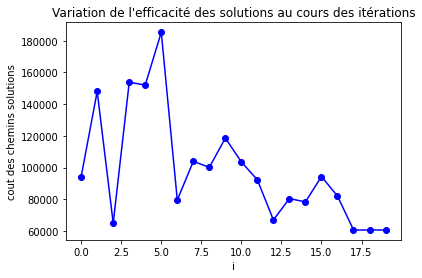

CPU times: user 21 s, sys: 140 ms, total: 21.1 s
Wall time: 20.8 s


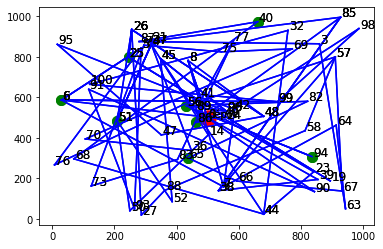

In [80]:
%%time
import random
import math

def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(e in TableauEntier):
            return True
    return False  
    
def verif_Not_Useless_Path(solution, package):
    for i in solution:
        if solution.count(i) > 1:
            occurs = [j for j, x in enumerate(solution) if x == i]
            for o in range(len(occurs)):
                if (o != len(occurs)-1):
                    if (not(verifPresenceElemtable1_In_table2(package,solution[occurs[o]+1:occurs[o+1]+1]))):
                        del solution[occurs[o]+1:occurs[o+1]+1]
                        return False
                    
    return True
#--------------------------------------------------------------------------------------------------------------------------------------------
            

def remove_useless_subpaths(solution, package):
    verif = False
    while(verif == False):#REMPLACER PAR WHILE
        verif = verif_Not_Useless_Path(solution, package)
    return solution
        
def plotAS(liste, listePoint, ):
    value = []
    index = []
    for i in range(len(liste)):
        value.append(liste[i][1])
        index.append(i)
    plt.plot(index, value, 'bo')
    plt.title("Variation de l'efficacité des solutions au cours des itérations")
    plt.xlabel('i')
    plt.ylabel('cout des chemins solutions')
    for i in range(len(index)-1):
        x = (i, i+1)
        y = (value[i], value[i+1])
        plt.plot(x, y,"b", linestyle="solid")
    plt.show()
        
    
    
#Functions of temp decreasing    
def TempReductionLinear(currTemp,alpha):
    currTemp -= alpha

def TempReductionGeometric(currTemp, alpha):
    currTemp *= alpha

def TempReductionsLowDecrease(currTemp, alpha):
    currTemp = currTemp / (1 + beta * currTemp)

def SimulatedAnnealing(matrix, package, listepoint, init_solution, init_temp, final_temp, iterationPerTemp = 100, alpha=10, beta=5):
    print(package)
    list_solution_cost = []
    currTemp = init_temp
    solution = init_solution
    while (currTemp > final_temp):
        for i in range(iterationPerTemp):
            newSolution = generateSolution(matrix, package)
            # get the cost between the two solutions
            cost = solutionLength(solution) - solutionLength(newSolution)
            # if the new solution is better, accept it
            if cost >= 0:
                solution = newSolution
            # if the new solution is not better, accept it with a probability of e^(-cost/temp)
            else:
                if ((-cost / currTemp) < 708 ):
                    if random.uniform(0, 1) < math.exp(-cost / currTemp):
                        solution = newSolution
        # decrement the temperature
        list_solution_cost.append([solution, solutionLength(solution)])
        currTemp -= alpha
        print(solution)
        print(solutionLength(solution))
        print("\n")
    cost_mini = None
    best_solution = None
    for i in range(len(list_solution_cost)):
        if (i == 0):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
        elif(list_solution_cost[i][1] < cost_mini):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
    print("best solution : " + str(best_solution))
    print("best solution poids : " + str(cost_mini))
    print("optimisation de la meilleure solution trouvee")
    print(remove_useless_subpaths(best_solution, package))
    print(solutionLength(best_solution))
    plotAS(list_solution_cost,listepoint)
    traceSolution(best_solution,package, pointList)
    return best_solution
    
    
    
traceSolution(SimulatedAnnealing(matrix, package, pointList, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=5),package, pointList)





# Solution finale dans instance:

In [34]:
def variationTraficTemps(solution, matrix):
    speed = 130
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.6, 9:0.6, 10:0.7, 11:0.9, 12:0.7, 13:0.7, 14:0.9, 15:1, 16:0.7, 17:0.6, 18:0.7}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        #print("currenttime "+str(currentTime))
        #print("speed : "+ str(speed* dict_speed_reduction_by_time[currentTime]))
        #print("distance: "+str(matrix[solution[p]][solution[p+1]]))
        time2points = int(matrix[solution[p]][solution[p+1]] /(speed* dict_speed_reduction_by_time[currentTime]))
        #print("time2points : "+ str(time2points))
        #print("\n")
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        else:
            currentTime += time2points
        
    return([totalDays, currentTime-8])

print(variationTraficTemps(SimulatedAnnealing(matrix, package, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=10),matrix))

[185, 20, 195, 109]
[0, 200, 169, 200, 199, 200, 169, 170, 169, 200, 0, 39, 38, 37, 64, 65, 120, 65, 66, 67, 68, 193, 194, 195, 194, 195, 196, 153, 196, 195, 196, 153, 154, 109, 110, 109, 110, 109, 110, 109, 110, 178, 179, 130, 129, 128, 129, 130, 179, 178, 179, 130, 179, 178, 110, 109, 110, 111, 112, 113, 114, 117, 114, 115, 114, 115, 116, 24, 116, 117, 114, 113, 76, 75, 76, 75, 92, 75, 74, 194, 195, 196, 197, 143, 197, 143, 197, 196, 153, 196, 153, 152, 151, 152, 41, 42, 56, 42, 56, 57, 12, 11, 12, 57, 56, 42, 43, 44, 155, 44, 155, 154, 109, 154, 155, 154, 153, 152, 151, 150, 149, 150, 149, 150, 89, 150, 151, 152, 41, 152, 153, 196, 153, 154, 153, 196, 197, 196, 153, 196, 195, 196, 195, 175, 176, 175, 174, 175, 195, 194, 193, 192, 193, 192, 17, 18, 19, 91, 92, 75, 74, 75, 74, 194, 74, 75, 76, 75, 76, 75, 92, 93, 94, 38, 37, 36, 37, 64, 37, 36, 35, 146, 145, 146, 35, 36, 34, 36, 34, 35, 146, 147, 101, 100, 166, 100, 166, 100, 99, 100, 101, 100, 99, 100, 99, 100, 166, 100, 101, 100, 16

[0, 200, 169, 170, 169, 168, 169, 168, 167, 168, 167, 123, 124, 118, 119, 118, 124, 123, 122, 121, 186, 185, 184, 55, 56, 42, 41, 40, 163, 162, 163, 40, 39, 40, 39, 38, 94, 95, 96, 95, 96, 97, 96, 97, 141, 97, 98, 99, 100, 99, 98, 97, 141, 140, 104, 140, 104, 105, 104, 105, 104, 140, 141, 140, 104, 103, 104, 103, 104, 103, 104, 105, 106, 107, 108, 95, 96, 95, 108, 107, 108, 107, 108, 109, 110, 109, 110, 111, 110, 109, 154, 153, 152, 151, 152, 153, 196, 153, 196, 195, 196, 195, 194, 195, 196, 197, 198, 125, 124, 118, 117, 114, 115, 116, 24, 23, 24, 23, 22, 21, 22, 21, 80, 21, 80, 21, 20, 19, 18, 19, 18, 17, 16, 17, 18, 67, 68, 69, 149, 148, 147, 146, 35, 146, 35, 146, 145, 144, 143, 144, 143, 142, 143, 142, 143, 142, 177, 142, 143, 197, 196, 195, 196, 197, 198, 125, 126, 127, 128, 127, 126, 127, 128, 129, 191, 190, 189, 188, 187, 186, 185, 184, 183, 184, 185, 184, 183, 182, 183, 157, 158, 159, 160, 159, 158, 105, 106, 145, 144, 168, 169, 168, 167, 168, 167, 123, 167, 166, 167, 123, 167,






## prise en compte des variations a chaques iterations

In [35]:
%%time
import random
import math

def variationTraficTemps(solution, matrix):
    speed = 130
    startTime = 8
    currentTime = startTime
    totalDays = 0
    
    dict_speed_reduction_by_time = {8:0.6, 9:0.6, 10:0.7, 11:0.9, 12:0.7, 13:0.7, 14:0.9, 15:1, 16:0.7, 17:0.6, 18:0.7}
    #------------------------------------------------------------------------------------------------------------------------------------------------
    for p in range(0,len(solution)-1):
        #print("currenttime "+str(currentTime))
        #print("speed : "+ str(speed* dict_speed_reduction_by_time[currentTime]))
        #print("distance: "+str(matrix[solution[p]][solution[p+1]]))
        time2points = int(matrix[solution[p]][solution[p+1]] /(speed* dict_speed_reduction_by_time[currentTime]))
        #print("time2points : "+ str(time2points))
        #print("\n")
        if ((18 - currentTime) < time2points):
            totalDays +=1
            currentTime = 8
        else:
            currentTime += time2points
        
    return([totalDays, currentTime-8])


def verifPresenceElemtable1_In_table2(elemsAVerifier, TableauEntier):
    for e in elemsAVerifier:
        if(e in TableauEntier):
            return True
    return False  
    
def verif_Not_Useless_Path(solution, package):
    for i in solution:
        if solution.count(i) > 1:
            occurs = [j for j, x in enumerate(solution) if x == i]
            for o in range(len(occurs)):
                if (o != len(occurs)-1):
                    if (not(verifPresenceElemtable1_In_table2(package,solution[occurs[o]+1:occurs[o+1]+1]))):
                        del solution[occurs[o]+1:occurs[o+1]+1]
                        return False
                    
    return True
#--------------------------------------------------------------------------------------------------------------------------------------------
            

def remove_useless_subpaths(solution, package):
    verif = False
    while(verif == False):#REMPLACER PAR WHILE
        verif = verif_Not_Useless_Path(solution, package)
    return solution
        
def plotASWithCounstraint(liste, listePoint):
    print("test")
    
    
#Functions of temp decreasing    
def TempReductionLinear(currTemp,alpha):
    currTemp -= alpha

def TempReductionGeometric(currTemp, alpha):
    currTemp *= alpha

def TempReductionsLowDecrease(currTemp, alpha):
    currTemp = currTemp / (1 + beta * currTemp)

def SimulatedAnnealing_variations(matrix, package, init_solution, init_temp, final_temp, iterationPerTemp = 100, alpha=10, beta=5):
    print(package)
    list_solution_cost = []
    currTemp = init_temp
    solution = init_solution
    while (currTemp > final_temp):
        for i in range(iterationPerTemp):
            newSolution = generateSolution(matrix, package)
            # get the cost between the two solutions
            costSolution = variationTraficTemps(solution,matrix)
            costNewSolution = variationTraficTemps(newSolution,matrix)
            cost = (costSolution[0]*11+costSolution[1]) - (costNewSolution[0]*11+costNewSolution[1])
            # if the new solution is better, accept it
            if cost >= 0:
                solution = newSolution
            # if the new solution is not better, accept it with a probability of e^(-cost/temp)
            else:
                if ((-cost / currTemp) < 708 ):
                    if random.uniform(0, 1) < math.exp(-cost / currTemp):
                        solution = newSolution
        # decrement the temperature
        list_solution_cost.append([solution, solutionLength(solution)])
        currTemp -= alpha
        print(solution)
        print("Distance totale: " + str(solutionLength(solution)))
        print("temps total en heure (journees de 11h) : "+ str(variationTraficTemps(solution,matrix)))
        print("\n")
    cost_mini = None
    best_solution = None
    for i in range(len(list_solution_cost)):
        if (i == 0):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
        elif(list_solution_cost[i][1] < cost_mini):
            cost_mini = list_solution_cost[i][1]
            best_solution = list_solution_cost[i][0]
    print("best solution : " + str(best_solution))
    print("best solution poids : " + str(cost_mini))
    print("optimisation de la meilleure solution trouvee")
    print(remove_useless_subpaths(best_solution, package))
    print(solutionLength(best_solution))
    print("temps en h apres simplification : " + str(variationTraficTemps(best_solution,matrix)))
    return best_solution

SimulatedAnnealing_variations(matrix, package, UniqueRandomSolution, 100, 1, iterationPerTemp = 50, alpha=10)

[185, 20, 195, 109]
[0, 200, 0, 1, 0, 1, 103, 104, 103, 102, 53, 102, 53, 102, 103, 1, 0, 39, 40, 39, 40, 163, 164, 163, 162, 107, 162, 161, 83, 161, 162, 161, 160, 161, 83, 82, 83, 82, 81, 82, 81, 25, 81, 82, 83, 161, 162, 163, 164, 132, 131, 180, 181, 90, 89, 88, 87, 86, 85, 138, 85, 138, 139, 11, 12, 57, 12, 57, 12, 57, 58, 59, 8, 7, 8, 59, 58, 59, 8, 9, 60, 9, 8, 59, 58, 57, 58, 29, 28, 27, 84, 83, 84, 83, 161, 83, 82, 30, 29, 28, 27, 28, 29, 28, 23, 22, 23, 24, 23, 22, 21, 80, 21, 20, 70, 69, 70, 20, 70, 71, 72, 71, 72, 73, 74, 73, 62, 73, 62, 61, 60, 9, 8, 7, 72, 73, 62, 63, 62, 73, 62, 73, 72, 7, 72, 71, 45, 71, 72, 73, 74, 73, 74, 194, 74, 73, 62, 63, 62, 61, 62, 63, 93, 63, 64, 65, 64, 65, 120, 121, 122, 61, 60, 9, 8, 7, 8, 7, 8, 59, 60, 61, 60, 61, 60, 9, 10, 9, 10, 172, 171, 170, 171, 170, 77, 76, 113, 112, 111, 112, 113, 112, 14, 112, 111, 110, 178, 110, 111, 13, 111, 110, 178, 179, 178, 177, 178, 110, 109, 154, 153, 152, 41, 42, 56, 57, 56, 55, 184, 185, 186, 187, 188, 187

[0, 39, 38, 39, 0, 1, 103, 1, 0, 39, 0, 200, 0, 39, 38, 37, 64, 65, 120, 119, 118, 119, 118, 117, 114, 117, 114, 117, 116, 24, 116, 115, 114, 113, 76, 77, 78, 77, 170, 169, 200, 0, 200, 0, 39, 38, 94, 38, 39, 0, 39, 0, 1, 0, 200, 199, 200, 169, 168, 167, 168, 169, 170, 171, 172, 10, 9, 60, 59, 58, 29, 30, 29, 58, 29, 30, 82, 83, 84, 83, 161, 162, 163, 164, 163, 164, 163, 162, 107, 108, 107, 162, 107, 106, 107, 106, 105, 104, 105, 104, 103, 1, 2, 15, 14, 112, 111, 13, 111, 13, 14, 15, 14, 112, 111, 110, 111, 13, 12, 11, 10, 9, 8, 9, 10, 11, 12, 13, 111, 110, 109, 108, 109, 154, 153, 196, 195, 196, 195, 194, 195, 175, 195, 194, 195, 175, 174, 88, 87, 88, 87, 88, 174, 173, 174, 173, 159, 158, 105, 106, 107, 162, 107, 106, 145, 106, 107, 162, 163, 164, 132, 164, 132, 133, 16, 17, 192, 17, 16, 15, 2, 15, 2, 3, 2, 3, 96, 3, 2, 15, 14, 13, 14, 112, 111, 110, 178, 177, 142, 143, 142, 177, 176, 175, 195, 196, 197, 198, 197, 196, 153, 196, 195, 194, 193, 192, 191, 129, 130, 131, 180, 181, 90, 18

[0, 39, 0, 200, 0, 200, 169, 170, 171, 172, 10, 11, 10, 172, 10, 9, 10, 11, 139, 11, 10, 9, 60, 59, 58, 57, 56, 42, 43, 99, 100, 101, 147, 101, 100, 166, 100, 166, 165, 86, 165, 164, 132, 164, 163, 162, 107, 162, 107, 106, 105, 104, 105, 104, 103, 1, 0, 200, 169, 200, 0, 39, 0, 39, 0, 200, 199, 198, 197, 196, 153, 196, 153, 154, 153, 152, 151, 152, 41, 152, 151, 150, 89, 150, 89, 88, 87, 86, 87, 88, 174, 175, 176, 31, 32, 31, 32, 33, 34, 36, 35, 146, 147, 148, 149, 69, 68, 67, 18, 17, 192, 191, 190, 191, 190, 191, 192, 191, 190, 191, 190, 115, 190, 189, 87, 86, 165, 86, 87, 86, 165, 166, 167, 166, 167, 168, 167, 168, 144, 143, 197, 196, 153, 154, 155, 154, 109, 154, 109, 154, 155, 44, 45, 46, 50, 46, 47, 185, 186, 121, 122, 123, 124, 118, 119, 120, 65, 64, 37, 36, 34, 35, 146, 147, 146, 147, 146, 35, 146, 35, 146, 147, 148, 26, 148, 26, 148, 147, 101, 100, 166, 100, 99, 43, 42, 43, 44, 43, 42, 43, 44, 155, 154, 155, 156, 157, 156, 157, 156, 155, 154, 155, 156, 6, 5, 6, 7, 72, 7, 72, 73

[0, 39, 0, 1, 0, 39, 38, 37, 36, 34, 36, 34, 33, 135, 33, 32, 31, 32, 31, 176, 177, 176, 177, 142, 141, 140, 139, 11, 139, 11, 10, 11, 139, 11, 10, 11, 12, 11, 12, 11, 10, 11, 10, 11, 10, 11, 12, 57, 56, 57, 58, 57, 56, 57, 58, 57, 56, 57, 12, 57, 56, 42, 43, 42, 56, 57, 58, 57, 12, 57, 58, 29, 30, 82, 81, 82, 83, 82, 81, 25, 26, 148, 149, 150, 89, 150, 149, 150, 151, 136, 151, 150, 151, 150, 89, 90, 181, 90, 91, 19, 20, 21, 80, 81, 25, 26, 27, 26, 27, 26, 27, 28, 27, 28, 27, 26, 148, 26, 27, 28, 27, 84, 85, 84, 83, 82, 81, 82, 81, 82, 30, 29, 30, 82, 81, 25, 81, 82, 30, 31, 30, 82, 81, 82, 30, 31, 176, 177, 176, 31, 176, 177, 142, 177, 178, 179, 130, 129, 130, 129, 128, 32, 33, 135, 33, 34, 36, 35, 34, 36, 34, 36, 34, 35, 36, 35, 146, 147, 146, 35, 34, 36, 34, 36, 35, 146, 35, 146, 35, 146, 147, 101, 147, 101, 147, 146, 147, 146, 145, 144, 145, 146, 35, 146, 35, 34, 35, 34, 36, 34, 33, 135, 33, 34, 35, 146, 35, 34, 35, 146, 35, 34, 35, 34, 33, 135, 136, 151, 136, 137, 136, 135, 136, 1

[0, 1, 2, 1, 103, 102, 53, 54, 53, 102, 103, 104, 105, 106, 145, 106, 107, 108, 107, 162, 107, 106, 145, 144, 143, 197, 198, 125, 126, 125, 126, 127, 48, 47, 48, 47, 185, 186, 187, 188, 187, 66, 65, 120, 65, 64, 37, 64, 37, 36, 35, 146, 35, 36, 37, 36, 37, 36, 37, 38, 37, 38, 39, 38, 37, 64, 63, 64, 63, 93, 94, 93, 94, 95, 94, 38, 39, 38, 94, 93, 94, 93, 63, 64, 37, 36, 37, 64, 63, 64, 37, 64, 63, 93, 63, 64, 37, 64, 63, 64, 63, 64, 65, 66, 187, 66, 187, 186, 121, 186, 121, 122, 123, 167, 123, 167, 166, 165, 164, 163, 164, 163, 162, 161, 162, 107, 106, 145, 146, 145, 146, 35, 36, 37, 64, 63, 93, 94, 93, 94, 38, 37, 64, 63, 64, 63, 93, 94, 93, 94, 93, 94, 38, 39, 40, 41, 152, 151, 136, 135, 134, 135, 136, 151, 150, 149, 148, 147, 101, 100, 166, 165, 166, 165, 86, 87, 86, 87, 86, 165, 164, 132, 131, 132, 164, 165, 164, 132, 164, 132, 131, 132, 131, 130, 131, 132, 131, 180, 181, 180, 181, 90, 91, 92, 75, 76, 113, 76, 75, 74, 194, 74, 194, 74, 73, 72, 71, 45, 46, 45, 46, 50, 49, 48, 127, 4

[0,
 39,
 40,
 163,
 164,
 132,
 131,
 180,
 181,
 90,
 89,
 88,
 87,
 86,
 85,
 138,
 139,
 11,
 12,
 57,
 58,
 29,
 28,
 23,
 22,
 21,
 20,
 70,
 20,
 70,
 71,
 72,
 73,
 62,
 63,
 64,
 65,
 120,
 121,
 122,
 61,
 60,
 9,
 10,
 172,
 171,
 170,
 77,
 76,
 113,
 112,
 111,
 110,
 109,
 154,
 153,
 152,
 41,
 42,
 56,
 55,
 184,
 185,
 186,
 185,
 47,
 46,
 45,
 44,
 155,
 154,
 153,
 196,
 195,
 175,
 195,
 175,
 195,
 194,
 74,
 75,
 76,
 113,
 112,
 111,
 110,
 109,
 108,
 95,
 96,
 3,
 2,
 1,
 0]